# Rewarding the original

Mahalanobis distance (or "generalized squared interpoint distance" for its squared value[3]) can also be defined as a dissimilarity measure between two random vectors ${\underline {x}}$  and ${\underline {y}}$ of the same distribution with the covariance matrix S:

$$ d({\vec {x}},{\vec {y}})={\sqrt {({\vec {x}}-{\vec {y}})^{T}S^{-1}({\vec {x}}-{\vec {y}})}}.\,$$

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['figure.figsize'] = (18.0, 10.0)


In [2]:
# make sure you have the 
import rto

# Filtering and interpolation of axis

### generate some sample data

In [3]:
## generate some samples
nsamples = 20
samples_t = np.cumsum(np.random.uniform(11,500, nsamples).astype(int))
samples_x = 100 * np.random.random((nsamples))

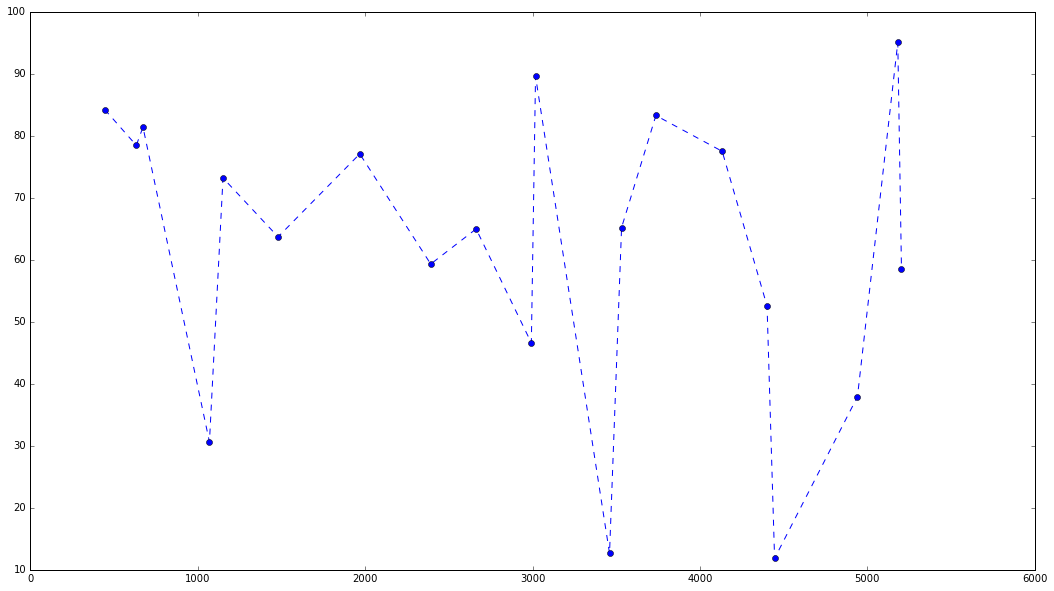

In [4]:
plt.plot(samples_t, samples_x, linestyle='--', marker='o')

## filter with axisfilter

The input paramters are stepsize, order and window. In this example case, order doesn't  matter since we are plotting only the position. Stepsize tells the step for linear interpolation between last sample and current sample, window tells the number of sample taken to average over.

In [6]:
axisfilter_0 = rto.AxisFilter(10, 2, 20)
axisfilter_1 = rto.AxisFilter(10, 2, 100)

In [7]:
t, x = [],[]
axisfilter = axisfilter_0
for sample_t, sample_x in zip(samples_t, samples_x):
    axisfilter.new_sample(sample_t, sample_x)
    t = np.hstack((t, axisfilter.interpolator.time_steps))
    x = np.hstack((x, axisfilter.samples[:,0]))
t0, x0 = t.copy(), x.copy()
    
t, x = [],[]
axisfilter = axisfilter_1
for sample_t, sample_x in zip(samples_t, samples_x):
    axisfilter_1.new_sample(sample_t, sample_x)
    t = np.hstack((t, axisfilter.interpolator.time_steps))
    x = np.hstack((x, axisfilter.samples[:,0]))
t1, x1 = t.copy(), x.copy()


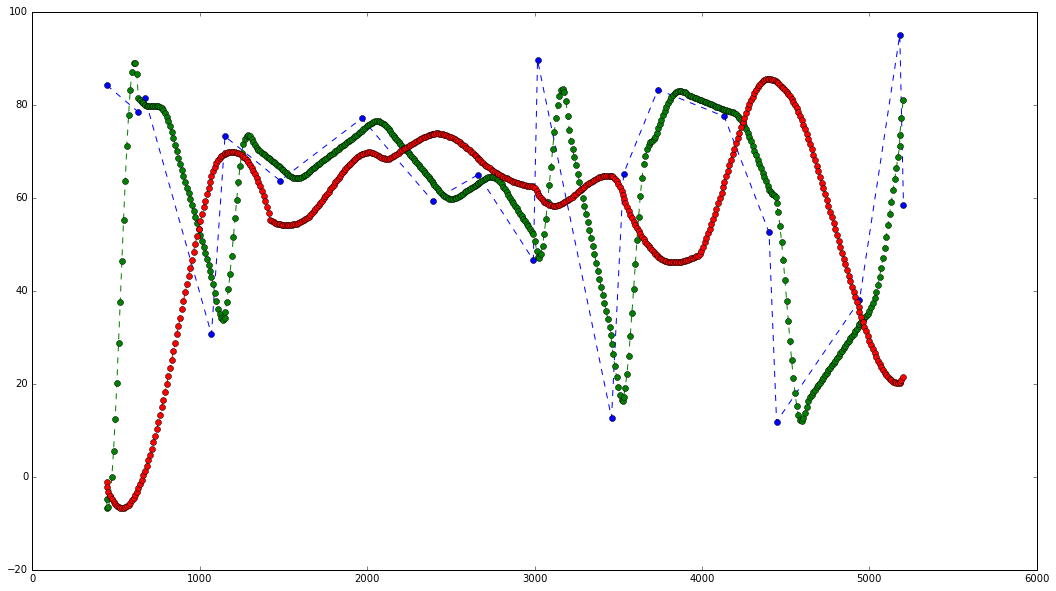

In [8]:
plt.plot(samples_t, samples_x, t0, x0, t1, x1, linestyle='--', marker='o')

# Using MotionExplorer

In [9]:
import rto

In [10]:
rto = reload(rto)

In [11]:
## generate some samples
nsamples = 100
samples_t = np.cumsum(np.random.uniform(11,100, nsamples).astype(int))
samples_x = np.hstack((50 * np.random.random((nsamples/2)), 150 * np.random.random((nsamples/2))))

In [15]:
mexp = rto.MotionExplorer(inputdim = 1, order = 2, start_buffer = 1, periodic_recompute = 1)

In [16]:
t, x, d, v = [],[],[],[]
for sample_t, sample_x in zip(samples_t, samples_x):
    d_, _ = mexp.new_sample(sample_t, (sample_x, ))
    d = np.hstack((d, [d_]))
    t = np.hstack((t, mexp.axis[0].interpolator.time_steps))
    x = np.hstack((x, mexp.axis[0].samples[:,0]))
    v = np.hstack((v, mexp.axis[0].samples[:,1]))

Plotting the original input position, the filtered position and computed velocity from the Savitsky Golay filter, as well as the dissimilarity measure for each sample. We can notice that over time the dissimilarity measure is going down over time as the input position is sample within the same distribution. However, at the middle of the original sampling the magnitude of the input of increased, leading to another period of dissimilarity until this new distribution is captured and the dissimilarity measure tends back to 0.

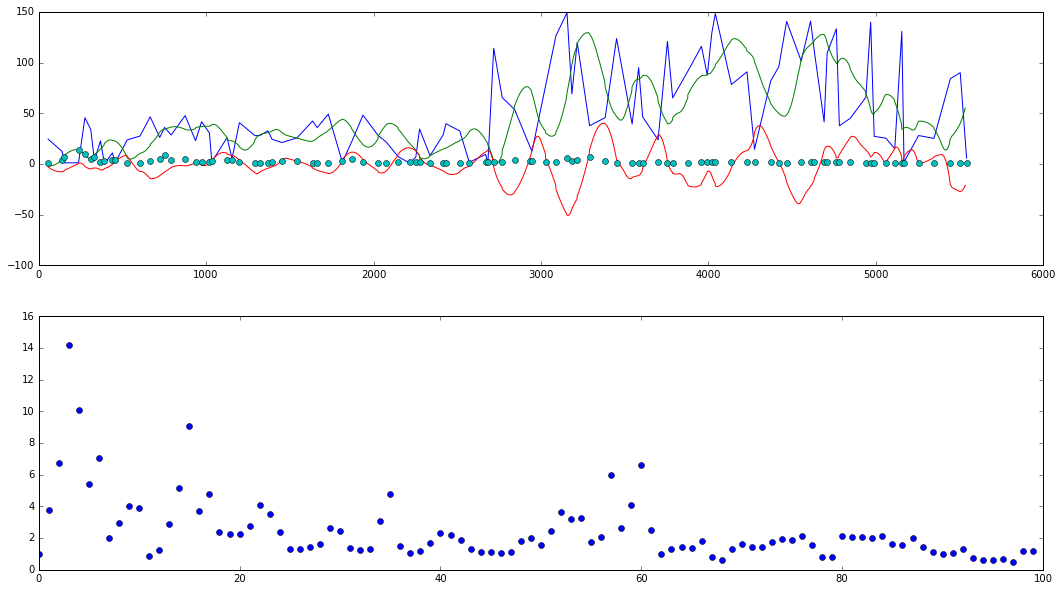

In [19]:
plt.subplot(211)
plt.plot(samples_t, samples_x, t, x, t, 10*v, samples_t, d, 'o')
plt.subplot(212)
plt.plot(d, 'o')

# SOM

In [20]:
jake_observations = np.load('jake_observations.npy')

In [21]:
import som
som = reload(som)
som_map = som.SOM(48,48,12)
som_map.learn(jake_observations, epochs=50000)

Epoch 	 0 /	 50000 	Lrate:0.50	 Sigma:10.00
Epoch 	 500 /	 50000 	Lrate:0.48	 Sigma:9.12
Epoch 	 1000 /	 50000 	Lrate:0.46	 Sigma:8.32
Epoch 	 1500 /	 50000 	Lrate:0.44	 Sigma:7.59
Epoch 	 2000 /	 50000 	Lrate:0.42	 Sigma:6.92
Epoch 	 2500 /	 50000 	Lrate:0.40	 Sigma:6.31
Epoch 	 3000 /	 50000 	Lrate:0.38	 Sigma:5.76
Epoch 	 3500 /	 50000 	Lrate:0.36	 Sigma:5.25
Epoch 	 4000 /	 50000 	Lrate:0.35	 Sigma:4.79
Epoch 	 4500 /	 50000 	Lrate:0.33	 Sigma:4.37
Epoch 	 5000 /	 50000 	Lrate:0.32	 Sigma:3.98
Epoch 	 5500 /	 50000 	Lrate:0.30	 Sigma:3.63
Epoch 	 6000 /	 50000 	Lrate:0.29	 Sigma:3.31
Epoch 	 6500 /	 50000 	Lrate:0.27	 Sigma:3.02
Epoch 	 7000 /	 50000 	Lrate:0.26	 Sigma:2.75
Epoch 	 7500 /	 50000 	Lrate:0.25	 Sigma:2.51
Epoch 	 8000 /	 50000 	Lrate:0.24	 Sigma:2.29
Epoch 	 8500 /	 50000 	Lrate:0.23	 Sigma:2.09
Epoch 	 9000 /	 50000 	Lrate:0.22	 Sigma:1.91
Epoch 	 9500 /	 50000 	Lrate:0.21	 Sigma:1.74
Epoch 	 10000 /	 50000 	Lrate:0.20	 Sigma:1.59
Epoch 	 10500 /	 50000 	Lrate:0.19	 

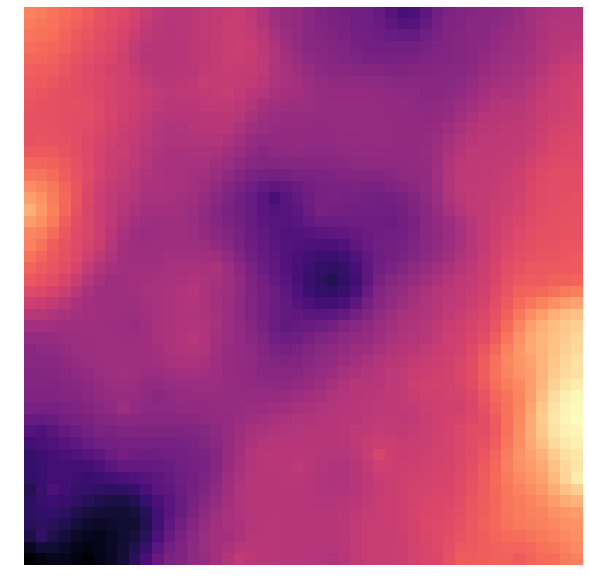

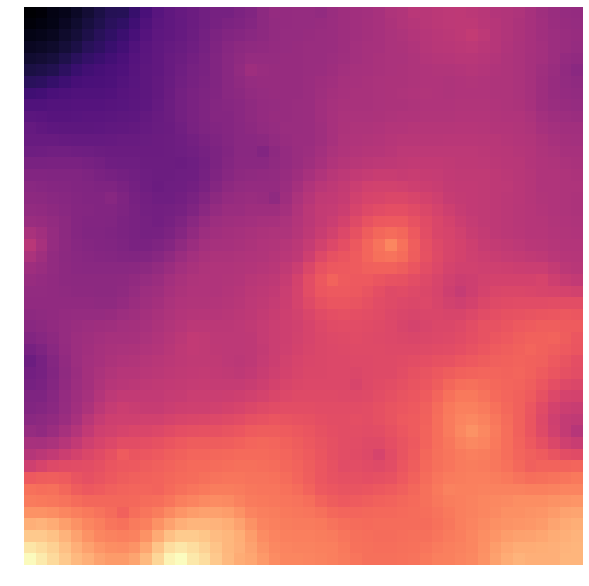

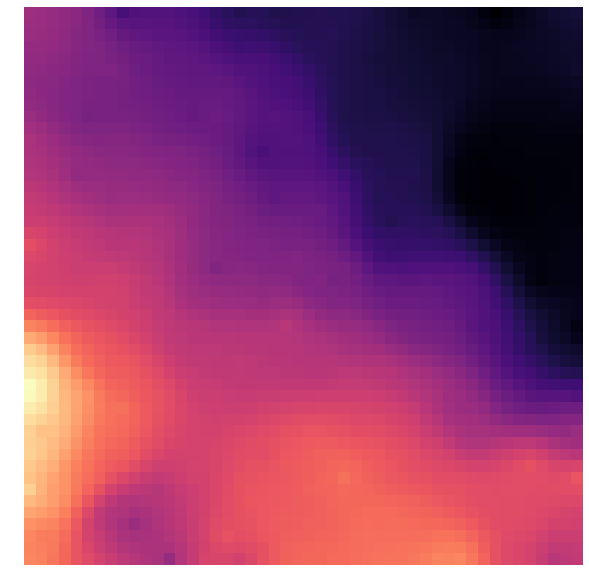

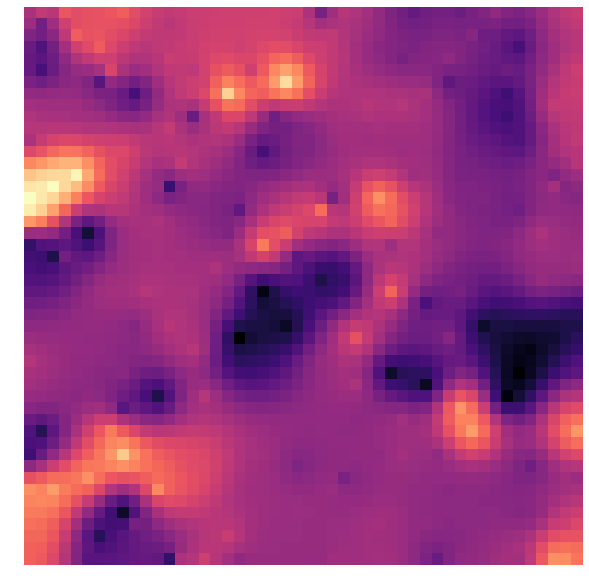

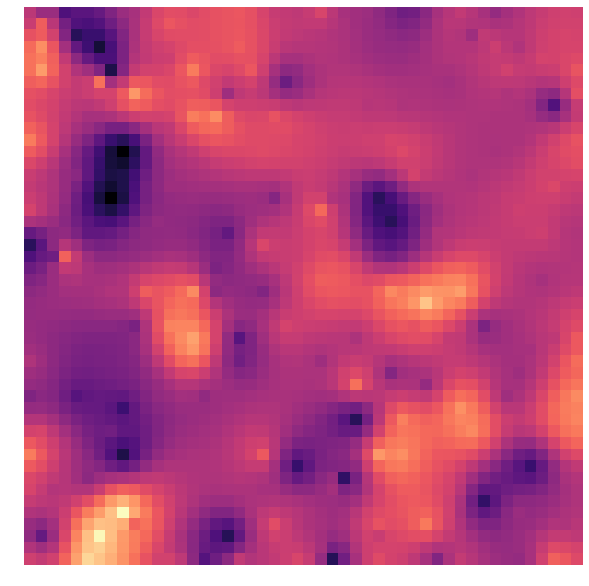

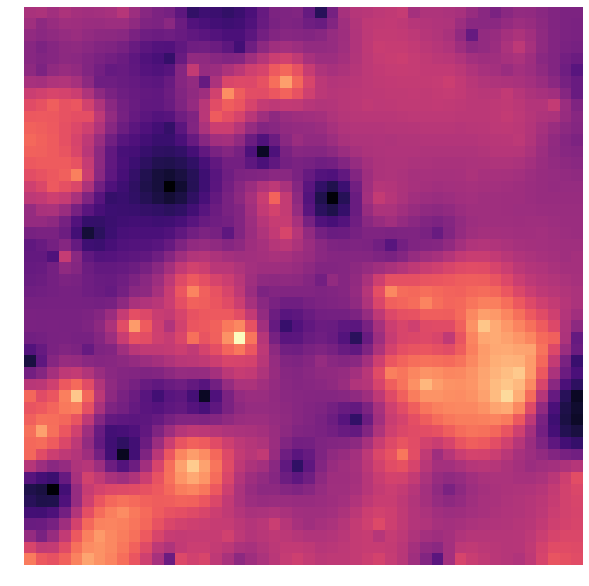

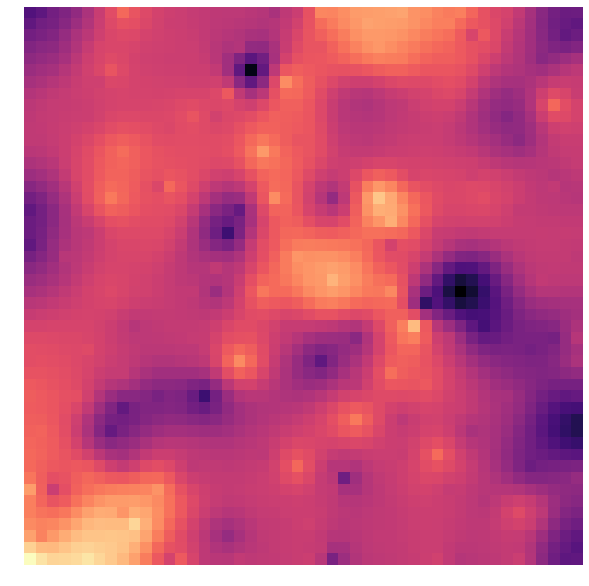

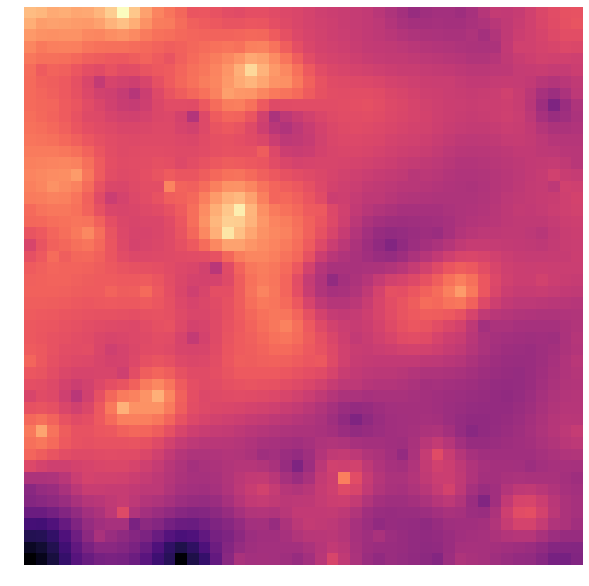

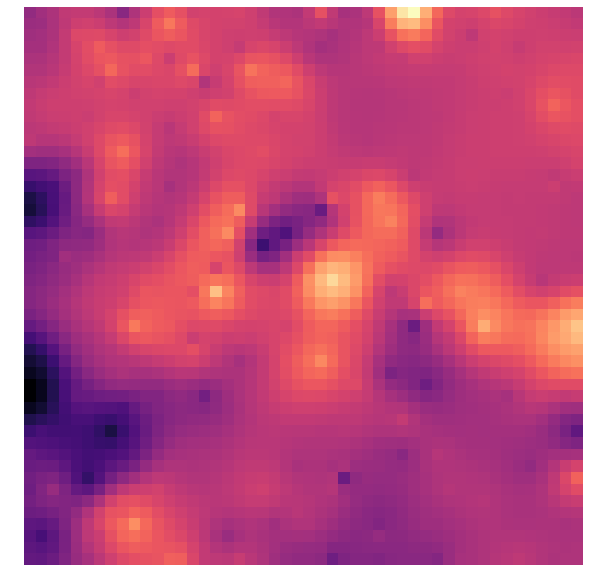

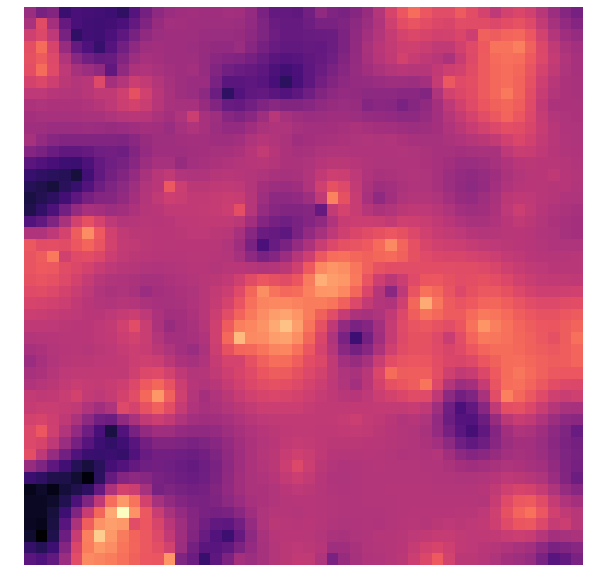

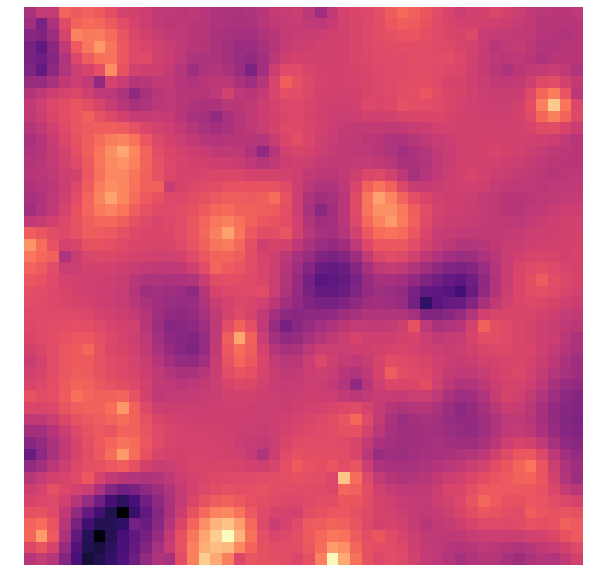

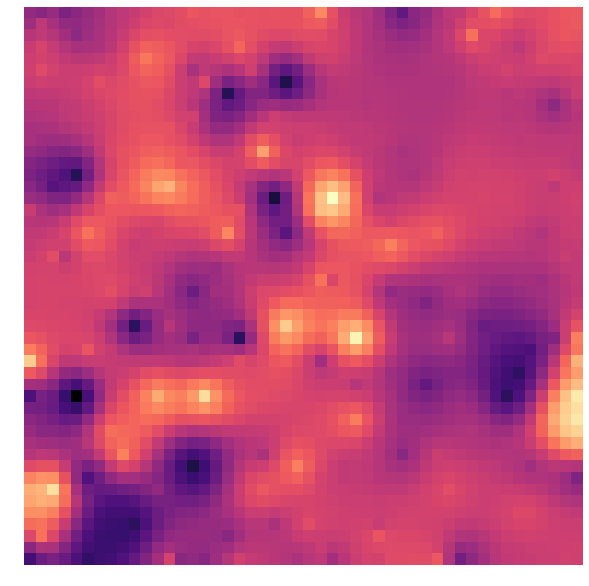

In [23]:
# for v in range(12):
for v in [0,4,8,1,5,9,2,6,10,3,7,11]:
    plt.figure()
    plt.imshow(som_map.codebook[:,:,v], cmap="magma", interpolation="nearest")
    plt.axis("off")

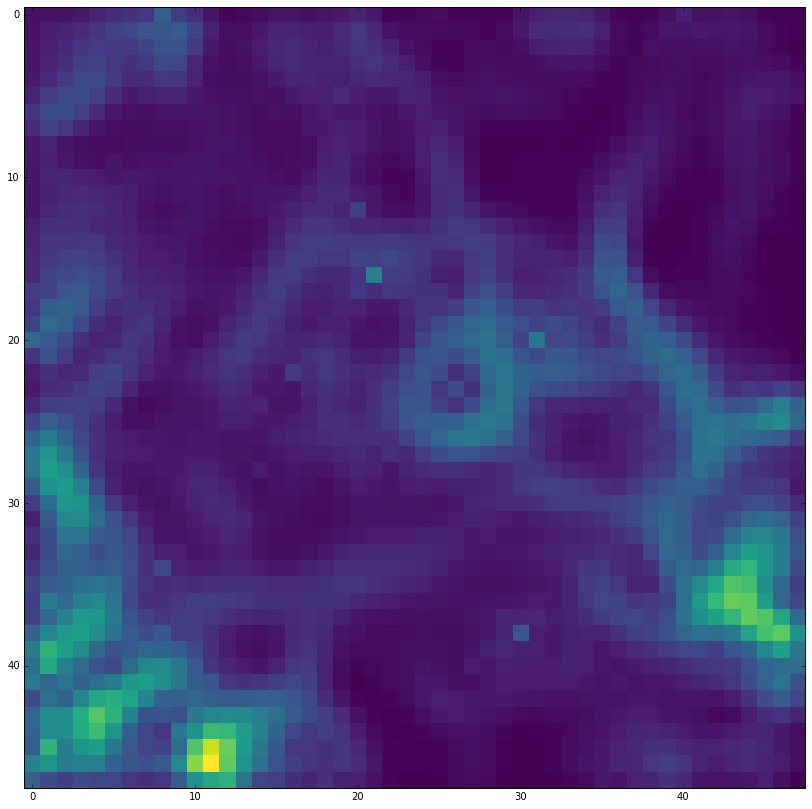

In [24]:
import scipy.spatial.distance

def umatrix(codebook):
    ## take the average HD distance to all neighbours within
    ## certain radius in the 2D distance    
    x_code, y_code = np.meshgrid(np.arange(codebook.shape[0]), np.arange(codebook.shape[1]))
    hdmatrix = codebook.reshape(codebook.shape[0]*codebook.shape[1], codebook.shape[2])    
    hd_distance = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(hdmatrix))**2
    ld_distance = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(np.vstack([x_code.ravel(), y_code.ravel()]).T))
    return np.mean(hd_distance * (np.logical_and(ld_distance>0,ld_distance<1.5)),axis=1).reshape(codebook.shape[0], codebook.shape[1])
    
plt.figure(figsize=(14,14))    
um = umatrix(som_map.codebook)    
plt.imshow(um, interpolation="nearest", cmap="viridis")
plt.grid("off")

# ISOMAP and trajectory from synthetic data

In [25]:
import sklearn
from sklearn import manifold

In [26]:
isomap = manifold.Isomap(n_neighbors=25)
isomap.fit(jake_observations)
xy = isomap.transform(jake_observations)
orig_xy = np.array(xy)

## generate synthetic data

We generate two different motions representing orthogonal rotations around X and Y axis, we get the output from the motion explorer for all samples and plot it on the isomap generated from the sample run.

In [32]:
stepsize = 10
samples_t = np.arange(10, 4000, stepsize)

cosdata = np.cos(2*np.pi/1000*samples_t)[:,None]
sindata = np.sin(2*np.pi/1000*samples_t)[:,None]
zerosdata = np.zeros((samples_t.shape + (1,)))
                     
rot_x = 1000 * np.hstack((zerosdata, cosdata, sindata))
rot_y = 1000 * np.hstack((cosdata, zerosdata, sindata))
rot_z = 1000 * np.hstack((cosdata, sindata, zerosdata))

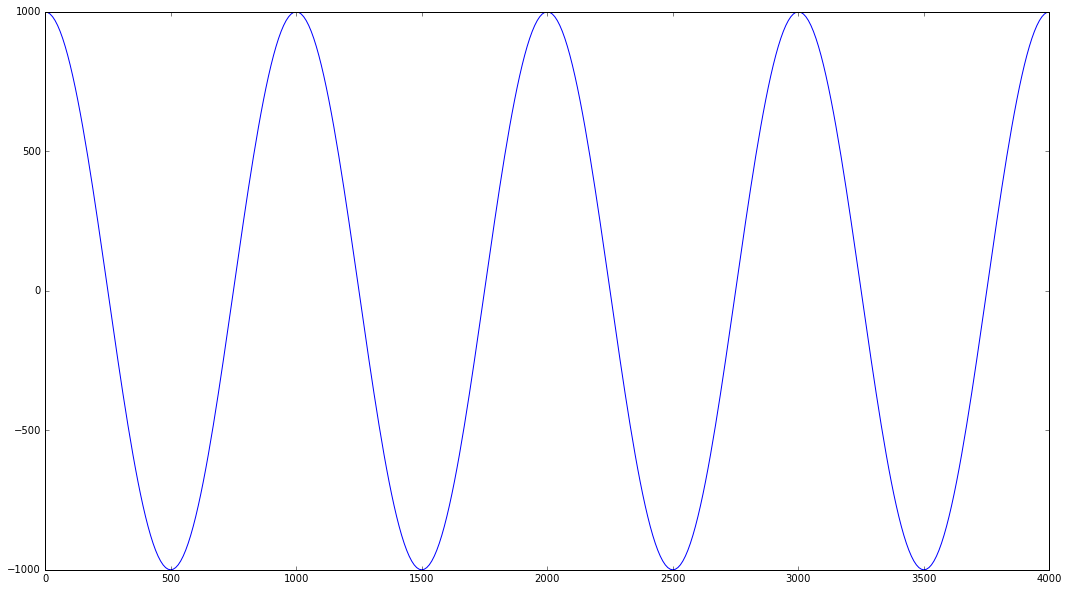

In [28]:
plt.plot(samples_t, rot_x[:,1])

In [33]:
order = 4
mexp_jake = rto.MotionExplorer(inputdim = 3, order = order, window = 100)
mexp_output = np.zeros((samples_t.shape[0], 12))

## get the output filtering from the JAKE for all the sample points
for i, (t, v) in enumerate(zip(samples_t, rot_x)):
    mexp_jake.new_sample(t, v)
    mexp_output[i] = mexp_jake.last_sample
rotx_xy = isomap.transform(mexp_output)

mexp_jake = rto.MotionExplorer(inputdim = 3, order = order, window = 100)
for i, (t, v) in enumerate(zip(samples_t, rot_y)):
    mexp_jake.new_sample(t, v)
    mexp_output[i] = mexp_jake.last_sample
roty_xy = isomap.transform(mexp_output)

mexp_jake = rto.MotionExplorer(inputdim = 3, order = order, window = 100)
for i, (t, v) in enumerate(zip(samples_t, rot_z)):
    mexp_jake.new_sample(t, v)
    mexp_output[i] = mexp_jake.last_sample
rotz_xy = isomap.transform(mexp_output)

Due to the filtering nature of the motion explorer, there is a lag in position.

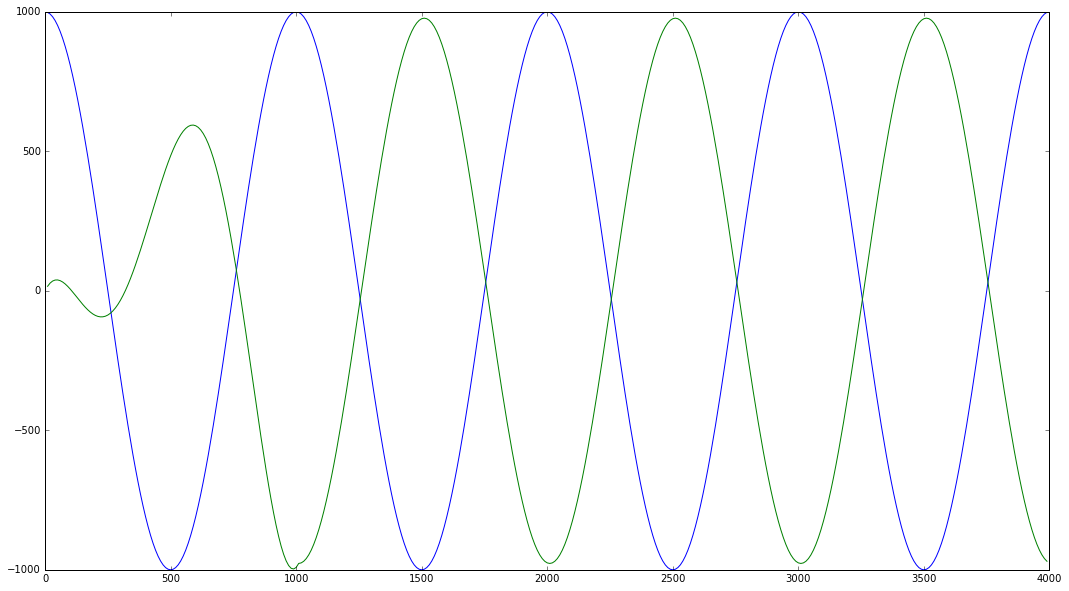

In [34]:
plt.plot(samples_t, rot_x[:,1], samples_t, mexp_output[:,0])

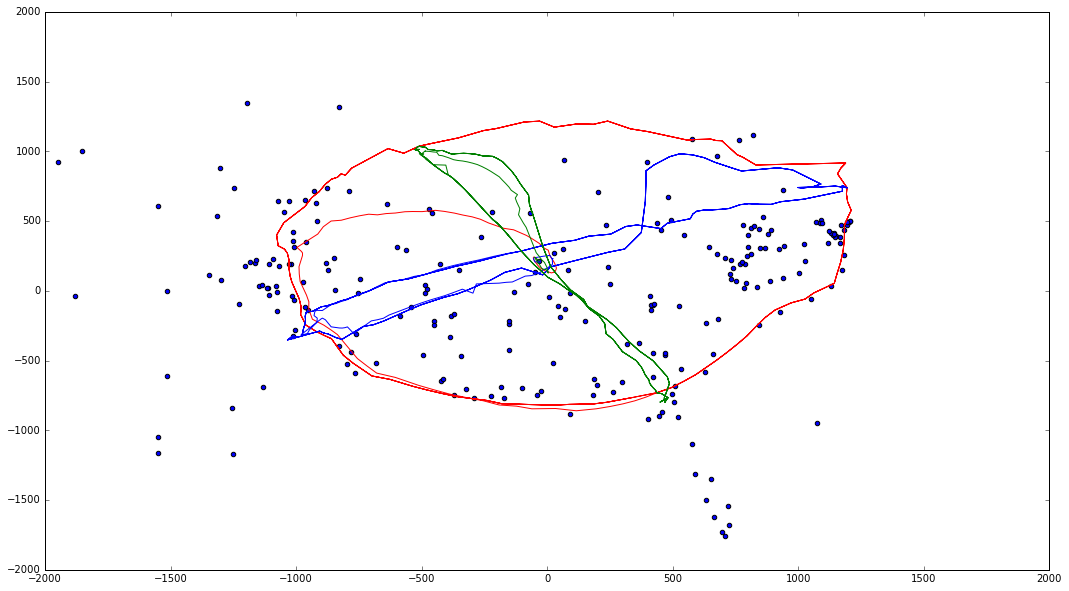

In [35]:
start = 0
plt.xlim([-2000,2000])
plt.ylim([-2000,2000])
plt.scatter(xy[:,0], xy[:,1])
plt.plot(rotx_xy[:,0], rotx_xy[:,1], 'r')
plt.plot(roty_xy[:,0], roty_xy[:,1], 'b')
plt.plot(rotz_xy[:,0], rotz_xy[:,1], 'g')


This synthetic data compare two rotations with period 1000 and 100. Note that the filtering induces a different amplitude too, since the filter might not be able to cope with frequency.

In [39]:
stepsize = 10
samples_t = np.arange(10, 4000, stepsize)

cosdata = np.cos(2*np.pi/100*samples_t)[:,None]
sindata = np.sin(2*np.pi/100*samples_t)[:,None]
zerosdata = np.zeros((samples_t.shape + (1,)))
                     
smallrot_x = 1000 * np.hstack((zerosdata, cosdata, sindata))
# rot_y = 1000 * np.hstack((cosdata, zerosdata, sindata))
# rot_z = 1000 * np.hstack((cosdata, sindata, zerosdata))

In [40]:
order = 4
mexp_jake = rto.MotionExplorer(inputdim = 3, order = order, window = 100)
mexp_output = np.zeros((samples_t.shape[0], 12))

## get the output filtering from the JAKE for all the sample points
for i, (t, v) in enumerate(zip(samples_t, smallrot_x)):
    mexp_jake.new_sample(t, v)
    mexp_output[i] = mexp_jake.last_sample
smallrotx_xy = isomap.transform(mexp_output)


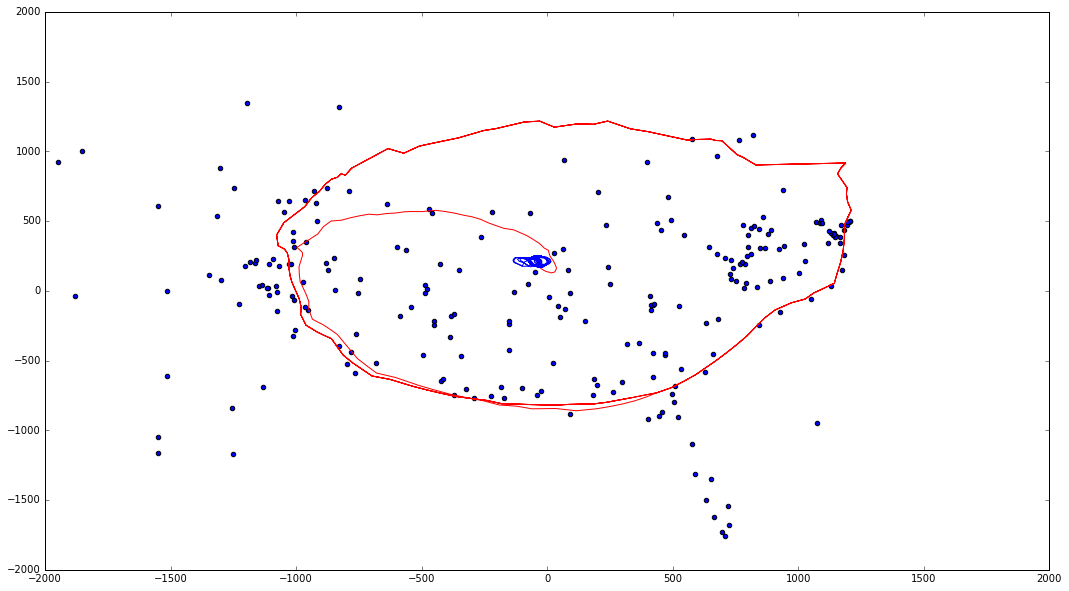

In [41]:
start = 0
plt.xlim([-2000,2000])
plt.ylim([-2000,2000])
plt.scatter(xy[:,0], xy[:,1])
plt.plot(rotx_xy[:,0], rotx_xy[:,1], 'r')
plt.plot(smallrotx_xy[:,0], smallrotx_xy[:,1], 'b')
# plt.plot(rotz_xy[:,0], rotz_xy[:,1], 'g')